# Final Project

## Real or Fake Job Posting Prediction and Analysis

This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

        1. ob_idUnique Job ID
        2. titleThe title of the job ad entry.
        3. locationGeographical location of the job ad.
        4. departmentCorporate department (e.g. sales).
        5. salary_rangeIndicative salary range (e.g. $50,000-$60,000)
        6. company_profileA brief company description.
        7. descriptionThe details description of the job ad.
        8. requirementsEnlisted requirements for the job opening.
        9. benefitsEnlisted offered benefits by the employer.
        10. telecommutingTrue for telecommuting positions.
        11. has_company_logoTrue if company logo is present.
        12. has_questionsTrue if screening questions are present.
        13. employment_typeFull-type, Part-time, Contract, etc.
        14. required_experienceExecutive, Entry level, Intern, etc.
        15. required_educationDoctorate, Master’s Degree, Bachelor, etc.
        16. industryAutomotive, IT, Health care, Real estate, etc.
        17. functionConsulting, Engineering, Research, Sales etc.
        18. fraudulenttarget - Classification attribute.


##### Acknowledgements
The University of the Aegean | Laboratory of Information & Communication Systems Security
http://emscad.samos.aegean.gr/

### Task

1. Build a model which capable to identify wether the job posting is Real or Fake!
2. Analyze the given data, in order to give an insight or suggestion to any applicants!

#### Questions
1. From the meta-information about the job, please identify what information is the most influental meta-information in order to classify wether the job posting is real or fake!
2. Top 10 most wanted job funtion!
3. According top 10 most wanted job function, please identfy total employment type!
4. What is the minimum required education?
5. Identify total job demand from the corellation based on Minimum Education and Minimum Experience!

### Wrangle

In [64]:
# 1. Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import imblearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn import datasets

# 2. Import Data Set

job = pd.read_csv('/home/victor/Desktop/fake_job_postings.csv')

# 3. Fill NaN Value in employment_type

job['employment_type'].fillna('Other', inplace = True)

# 4. Fill NaN Value in required_education

job['required_education'].fillna('Unspecified', inplace = True)

# 4. Fill NaN Value in required_experience

job['required_experience'].fillna('Other', inplace = True)

In [65]:
job.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,Unspecified,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unspecified,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,Other,Other,Unspecified,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Explore 

1. From the meta-information about the job, please identify what information is the most influental in order to classify wether the job posting is real or fake!

In [28]:
# Import data set
job = pd.read_csv('/home/victor/Desktop/fake_job_postings.csv')

# Drop unecerssary columns
job = job.drop(columns=['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function'])

# Separate the independent variables (x) and dependent variables (y)
x = job.drop(columns={'fraudulent'})
y = job['fraudulent']

# Encode the Research column using One Hot Encoding
x = pd.get_dummies(x, columns=['telecommuting', 'has_company_logo', 'has_questions'])

# Split the data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Upsampling minority data using SMOTE
smt = SMOTE()
x_train, y_train = smt.fit_sample(x_train, y_train)

# Initiate the model and train it
model = LogisticRegression()
model.fit(x_train, y_train)

# Testing and evaluation
y_pred = model.predict(x_test)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score: {}'.format(accuracy))

# Recall
accuracy = metrics.recall_score(y_test, y_pred)
print('Recall Score: {}'.format(accuracy))

# Confusion
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
print('TN: {}'.format(tn))
print('FP: {}'.format(fp))
print('FN: {}'.format(fn))
print('TP: {}'.format(tp))

Accuracy Score: 0.8092841163310962
Recall Score: 0.6405228758169934
TN: 2796
FP: 627
FN: 55
TP: 98


In [35]:
# Identify total y_train

np.bincount(y_train)

array([13591, 13591])

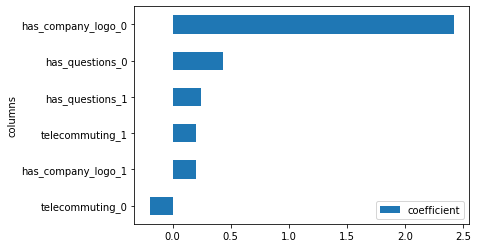

In [36]:
# Most influental meta-inforamation based on coef

coef = pd.DataFrame({'columns': x.columns.tolist(),
                     'coefficient': model.coef_[0].tolist()})

coef = coef.sort_values('coefficient')

coef.plot(x='columns', y='coefficient', kind='barh')

2. Top 10 most wanted job funtion!

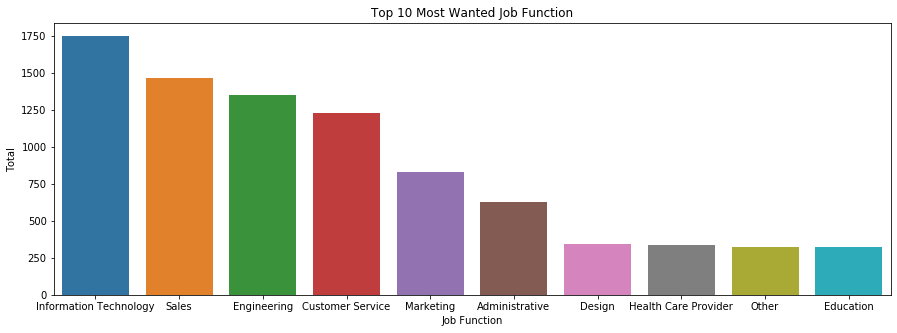

In [140]:
top10_job = job.groupby('function', as_index=False)['job_id'] \
               .count() \
               .sort_values('job_id', ascending=False) \
               .rename(columns={'job_id': 'total'}) \
               .head(10)

plt.figure(figsize=(15,5))
viz = sns.barplot(data=top10_job, x='function', y='total')
plt.title('Top 10 Most Wanted Job Function')
plt.xlabel('Job Function')
plt.ylabel('Total')
plt.show()

In [165]:
top10_job = job.groupby('function', as_index=False)['job_id'] \
               .count() \
               .sort_values('job_id', ascending=False) \
               .rename(columns={'job_id': 'Total',
                                'function': 'Job Function'}) \
               .head(10)

top10_job

,Job Function,Total
18,Information Technology,1749
31,Sales,1468
12,Engineering,1348
7,Customer Service,1229
22,Marketing,830
1,Administrative,630
9,Design,340
16,Health Care Provider,338
23,Other,325
11,Education,325


3. According top 10 most wanted job function, please identfy total employment type!

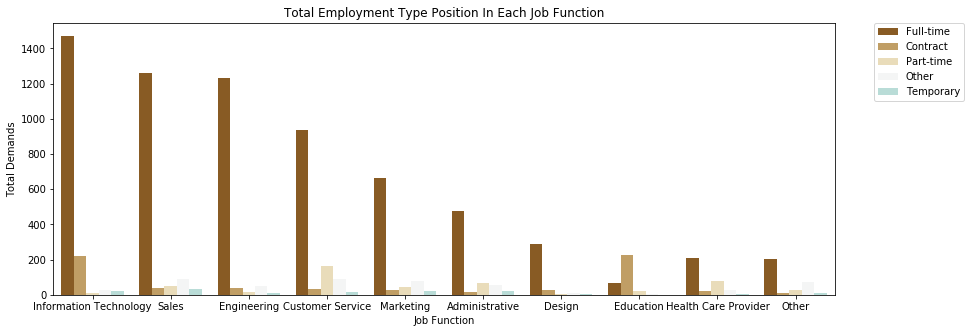

In [173]:
job = pd.read_csv('/home/victor/Desktop/fake_job_postings.csv')

job['employment_type'].fillna('Other', inplace = True)

job = job[job['function'].isin(list(top10_job['Job Function']))]

employment_ = job.groupby(['function', 'employment_type'], as_index=False)['job_id'] \
                .count() \
                .sort_values('job_id', ascending=False) \
                .rename(columns={'job_id': 'total_demand'})


plt.figure (figsize=(14,5))
viz = sns.barplot(data=employment_, x='function', y='total_demand', hue='employment_type', palette=sns.color_palette("BrBG", 7))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Total Employment Type Position In Each Job Function')
plt.xlabel('Job Function')
plt.ylabel('Total Demands')
plt.show()

4. What is the minimum required education?

In [152]:
job = pd.read_csv('/home/victor/Desktop/fake_job_postings.csv')

job['required_education'].fillna('Unspecified', inplace = True)

job.groupby('required_education', as_index=False)['job_id'] \
   .count() \
   .sort_values('job_id', ascending=False) \
   .rename(columns={'job_id': 'Total Demand',
                    'required_education': 'Minimum Education'}) \
   .head()

,Minimum Education,Total Demand
9,Unspecified,9502
1,Bachelor's Degree,5145
4,High School or equivalent,2080
5,Master's Degree,416
0,Associate Degree,274


5. Identify total job demand from the corellation based on Minimum Education and Minimum Experience!

In [161]:
job = pd.read_csv('/home/victor/Desktop/fake_job_postings.csv')

job['required_education'].fillna('Unspecified', inplace = True)
job['required_experience'].fillna('Other', inplace = True)
job['employment_type'].fillna('Other', inplace = True)

job.groupby(['required_education', 'required_experience'], as_index=False)['job_id'] \
   .count() \
   .sort_values('job_id', ascending=False) \
   .rename(columns={'job_id': 'Total Demand',
                    'required_education': 'Minimum Education',
                    'required_experience': 'Minimum Experience'}) \
   .head()

,Minimum Education,Minimum Experience,Total Demand
71,Unspecified,Other,5856
13,Bachelor's Degree,Mid-Senior level,1994
69,Unspecified,Mid-Senior level,1382
31,High School or equivalent,Entry level,1193
8,Bachelor's Degree,Associate,1021


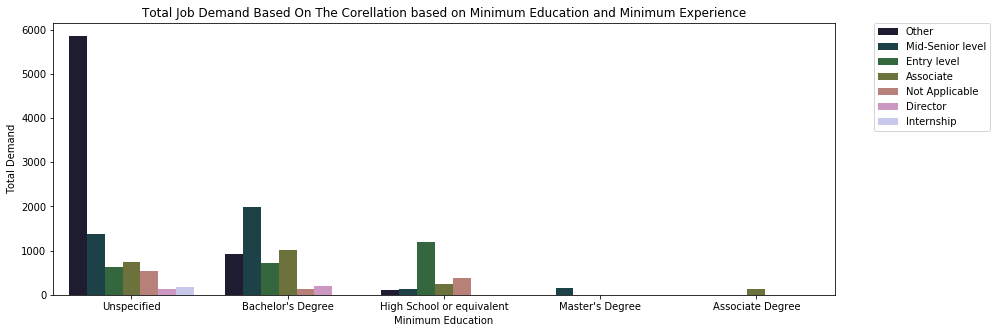

In [179]:
job = pd.read_csv('/home/victor/Desktop/fake_job_postings.csv')

job['required_education'].fillna('Unspecified', inplace = True)
job['required_experience'].fillna('Other', inplace = True)
job['employment_type'].fillna('Other', inplace = True)

demand = job.groupby(['required_education', 'required_experience'], as_index=False)['job_id'] \
            .count() \
            .sort_values('job_id', ascending=False) \
            .rename(columns={'job_id': 'Total Demand',
                            'required_education': 'Minimum Education',
                            'required_experience': 'Minimum Experience'}) \
            .head(20)

plt.figure(figsize=(14,5))
viz = sns.barplot(data=demand, x='Minimum Education', y='Total Demand', hue='Minimum Experience', palette=(sns.color_palette("cubehelix", 8)))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Total Job Demand Based On The Corellation based on Minimum Education and Minimum Experience')
plt.xlabel('Minimum Education')
plt.show()

### Conclusion

1. From the coef diagram above, the most influential information in this classification model is wether <b><i><u>the company has logo or not</b></i></u>.
The result from classification model to identify real or fake job posting we got:
        - Accuracy Score: 0.8092841163310962
        - Recall Score: 0.6405228758169934
        - TN: 2796
        - FP: 627
        - FN: 55
        - TP: 98

2. <i>Top 10 job function</i> are:
        1. Information Technology with the total job posting 1749.
        2. Sales with the total job posting 1468.
        3. Engineering with the total job posting 1348.
        4. Customer Service with the total job posting 1229.
        5. Marketing with the total job posting 830.
        6. Administrative with the total job posting 630.
        7. Design with the total job posting 340.
        8. Health Care Provider with the total job posting 338.
        9. Other with the total job posting 350.
        10. Education with the total job posting 325.

3. Based on <i>top 10 job function</i> most of the job is open for <b><i><u>Full-Time position</b></i></u>.


4. Based on the table data analization above <b><u>9502</u> job posting <i><u>Unspecified</i></u> the minimum education level</b>, but on the second place we know that <b><u>5145</u> job posting required <i><u>Bachelor's Degree</i></u> as the <i>minimum education level</i>.
    
    
5. There are <b><i><u>5856 (almost 1/3 from the total data)</b></i></u> job posting which do not specify the <i><b>minimum education</i></b> and <i><b>minimum experience</i></b>, those two parameters might be used as the new parameters to tuning the classification model in order to increase the accuracy score.